In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Boston Housing Dataset

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
df_boston = pd.read_csv('boston_housing.csv')
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
print("Total Rows : ", df_boston.shape[0])
print("Total Cols : ", df_boston.shape[1])
print("Dengan Missing values : ", df_boston.isnull().sum().sum())

Total Rows :  506
Total Cols :  14
Dengan Missing values :  0


### Feature Selection

Jika kita lihat dari deskrpsi feature medv lah yang menjadi variable target

Melihat Korelasi feature lain dengan variable target

In [15]:
df_boston.corr()['medv'].to_frame()

,medv
crim,-0.388305
zn,0.360445
indus,-0.483725
chas,0.175260
nox,-0.427321
rm,0.695360
age,-0.376955
dis,0.249929
rad,-0.381626
tax,-0.468536


Terdapat dua feature yang berkorelasi kuat dengan variable target, yakti lstat serta rm. Dan satu feature yang berkorelasi sedang ( > 0.5) yakni ptratio

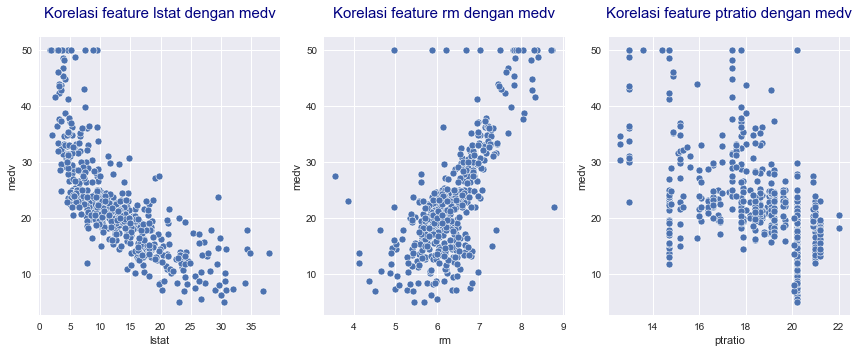

In [38]:
cols = ['lstat','rm','ptratio']
nrows = 1
fig, ax = plt.subplots(nrows=nrows, ncols=len(cols),figsize=(12,5))

indexrow = 0
for indexcol, col in enumerate(cols):
    sns.scatterplot(x=col, y='medv', data=df_boston, ax=ax[indexcol])
    ax[indexcol].set_title("Korelasi feature "+ col +" dengan medv", pad=20, size=15, color='navy')
fig.tight_layout()
plt.show()

Jika dilihat dua feature kuat berkorelasi cukup linear 

Oleh karenanya kita akan menggunakan dua percobaan, 
1. Menggunakan dua feature kuat
2. Menggunakan 3 feature

# 1. Model Linear Regression

Sebelum kita membuat model, kita periksa terlebih dahulu skala dari feature kita

In [111]:
feature = df_boston[['lstat','rm']]
feature.head()

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


Jika dilihat, skala tidak terlalu jauh sehingga tidak perlu kita normalisasi

In [112]:
target = df_boston['medv']

###### Membagi data menjadi data training dan testing

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, train_size=0.8, random_state=85)

##### Membuat Model

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
Linear_Regression = LinearRegression()

In [117]:
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [118]:
Linear_Regression.score(X_test, y_test)

0.7617231986910025

In [119]:
y_pred = Linear_Regression.predict(X_test)

F:\1. BELAJAR-MANDIRI\Belajar-Bahasa-Pemrograman\Latihan-Python\Portofolio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


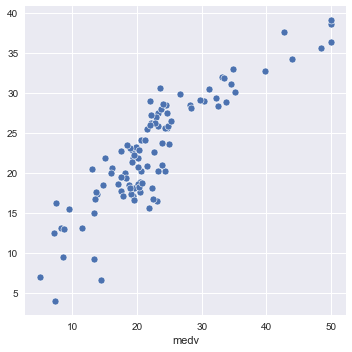

In [120]:
plt.figure(figsize=(5,5))
sns.scatterplot(y_test, y_pred)
plt.tight_layout()
plt.show()

In [121]:
feature2 = df_boston[['lstat','rm','ptratio']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(feature2, target, train_size=0.8, random_state=85)

In [122]:
Linear_Regression.fit(X_train2, y_train2)
Linear_Regression.score(X_test2, y_test2)

0.8064293995761349

Sedikit menambah akurasi model yang kita buat

F:\1. BELAJAR-MANDIRI\Belajar-Bahasa-Pemrograman\Latihan-Python\Portofolio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


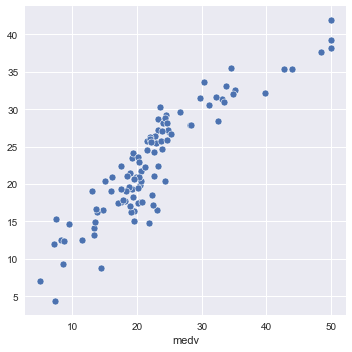

In [123]:
y_pred2 = Linear_Regression.predict(X_test2) 
plt.figure(figsize=(5,5))
sns.scatterplot(y_test2, y_pred2)
plt.tight_layout()
plt.show()

 # 2. SVR

In [126]:
from sklearn.svm import SVR

In [127]:
suport_vector_regresor = SVR(C=1000, gamma=0.005, kernel='rbf')

In [128]:
suport_vector_regresor.fit(X_train, y_train)

SVR(C=1000, gamma=0.005)

In [129]:
suport_vector_regresor.score(X_test, y_test)

0.8624610038467397

F:\1. BELAJAR-MANDIRI\Belajar-Bahasa-Pemrograman\Latihan-Python\Portofolio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


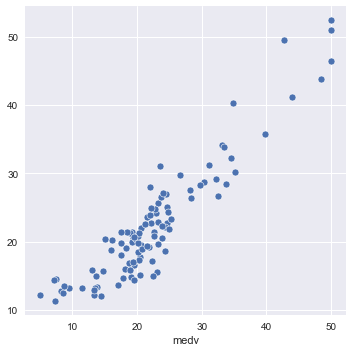

In [130]:
y_pred3 = suport_vector_regresor.predict(X_test)
plt.figure(figsize=(5,5))
sns.scatterplot(y_test, y_pred3)
plt.tight_layout()
plt.show()

In [132]:
suport_vector_regresor.fit(X_train2, y_train2)
print(suport_vector_regresor.score(X_test2, y_test2))
y_pred4 = suport_vector_regresor.predict(X_test2)

0.8931455855703193


F:\1. BELAJAR-MANDIRI\Belajar-Bahasa-Pemrograman\Latihan-Python\Portofolio\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


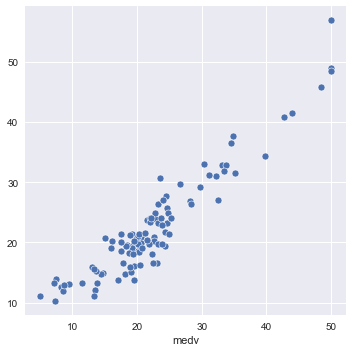

In [133]:
plt.figure(figsize=(5,5))
sns.scatterplot(y_test, y_pred4)
plt.tight_layout()
plt.show()

Dari keempat percobaan grafik keempat terlihat semakin linear, itu berarti model kita semakin baik